In [2]:
import numpy as np
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import great_tables as tg

In [3]:
df = pl.read_csv("../../DATA/airline_tweets.csv")

In [4]:
df

tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
i64,str,f64,str,f64,str,str,str,str,i64,str,str,str,str,str
570306133677760513,"""neutral""",1.0,null,null,"""Virgin America""",null,"""cairdin""",null,0,"""@VirginAmerica What @dhepburn …",null,"""2015-02-24 11:35:52 -0800""",null,"""Eastern Time (US & Canada)"""
570301130888122368,"""positive""",0.3486,null,0.0,"""Virgin America""",null,"""jnardino""",null,0,"""@VirginAmerica plus you've add…",null,"""2015-02-24 11:15:59 -0800""",null,"""Pacific Time (US & Canada)"""
570301083672813571,"""neutral""",0.6837,null,null,"""Virgin America""",null,"""yvonnalynn""",null,0,"""@VirginAmerica I didn't today.…",null,"""2015-02-24 11:15:48 -0800""","""Lets Play""","""Central Time (US & Canada)"""
570301031407624196,"""negative""",1.0,"""Bad Flight""",0.7033,"""Virgin America""",null,"""jnardino""",null,0,"""@VirginAmerica it's really agg…",null,"""2015-02-24 11:15:36 -0800""",null,"""Pacific Time (US & Canada)"""
570300817074462722,"""negative""",1.0,"""Can't Tell""",1.0,"""Virgin America""",null,"""jnardino""",null,0,"""@VirginAmerica and it's a real…",null,"""2015-02-24 11:14:45 -0800""",null,"""Pacific Time (US & Canada)"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
569587686496825344,"""positive""",0.3487,null,0.0,"""American""",null,"""KristenReenders""",null,0,"""@AmericanAir thank you we got …",null,"""2015-02-22 12:01:01 -0800""",null,null
569587371693355008,"""negative""",1.0,"""Customer Service Issue""",1.0,"""American""",null,"""itsropes""",null,0,"""@AmericanAir leaving over 20 m…",null,"""2015-02-22 11:59:46 -0800""","""Texas""",null
569587242672398336,"""neutral""",1.0,null,null,"""American""",null,"""sanyabun""",null,0,"""@AmericanAir Please bring Amer…",null,"""2015-02-22 11:59:15 -0800""","""Nigeria,lagos""",null


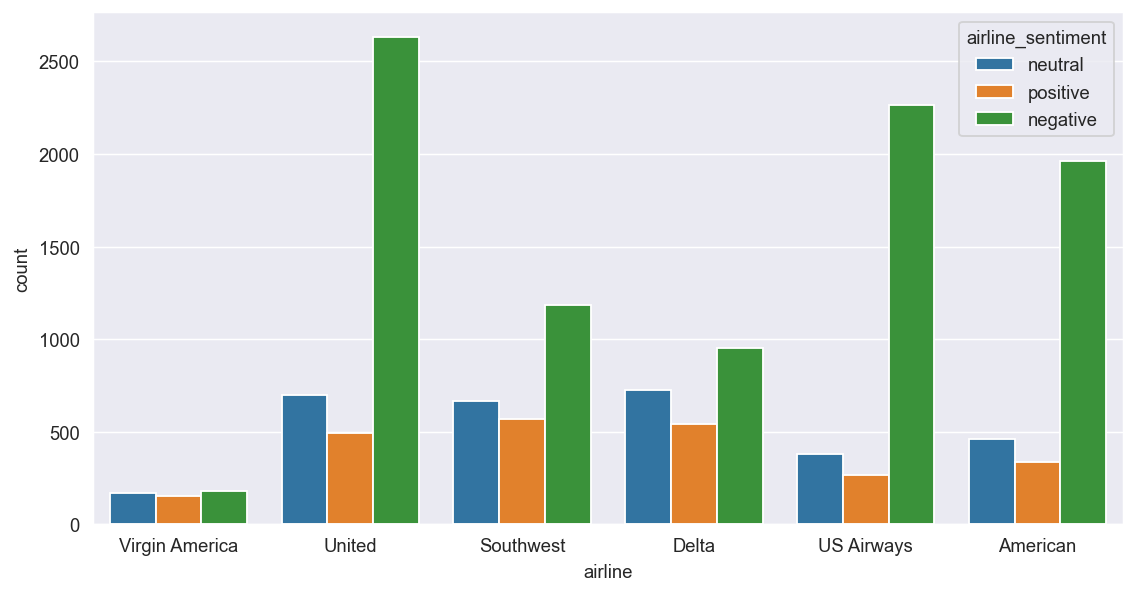

In [7]:
plt.figure(figsize=(10, 5), dpi=133)
sns.countplot(data=df, x='airline', hue='airline_sentiment')
plt.show()

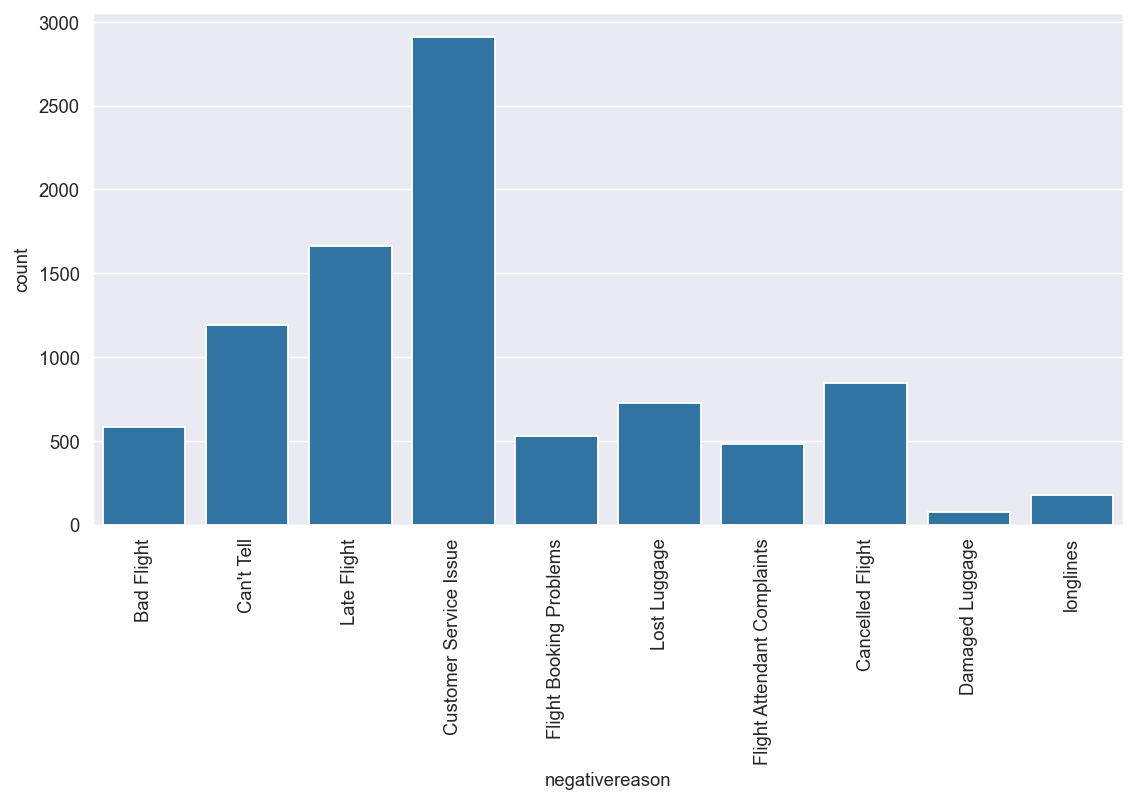

In [11]:
plt.figure(figsize=(10, 5), dpi=133)
sns.countplot(data=df, x='negativereason')
plt.xticks(rotation=90)
plt.show()

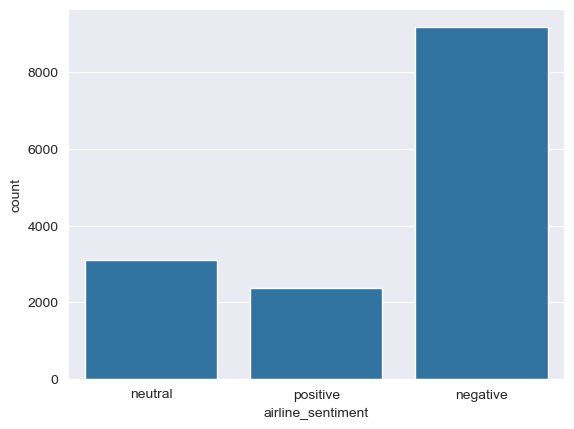

In [13]:
sns.countplot(data=df, x='airline_sentiment')
plt.show()

In [16]:
df['airline_sentiment'].value_counts()

airline_sentiment,count
str,u32
"""neutral""",3099
"""negative""",9178
"""positive""",2363


In [79]:
X = df['text']

In [80]:
y = df['airline_sentiment']

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [84]:
tfidf = TfidfVectorizer(stop_words='english')

In [85]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [86]:
X_train_tfidf = tfidf.transform(X_train)

In [87]:
X_test_tfidf = tfidf.transform(X_test)

In [88]:
X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 107073 stored elements and shape (11712, 12971)>

In [89]:
from sklearn.naive_bayes import MultinomialNB

In [90]:
multinomial_nb = MultinomialNB()

In [91]:
multinomial_nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
logistic_model = LogisticRegression(max_iter=1000)

In [94]:
logistic_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [95]:
from sklearn.svm import LinearSVC

In [96]:
svc = LinearSVC()

In [97]:
svc.fit(X_train_tfidf, y_train)

LinearSVC()

In [98]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [104]:
def report(model):
    predictions = model.predict(X_test_tfidf)
    print(classification_report(
        y_test,
        predictions,
        zero_division=0
    ))
    ConfusionMatrixDisplay.from_predictions(
        y_test,
        predictions,
        cmap='Blues',
    ).ax_.grid(False)
    plt.show()

MB Model
              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



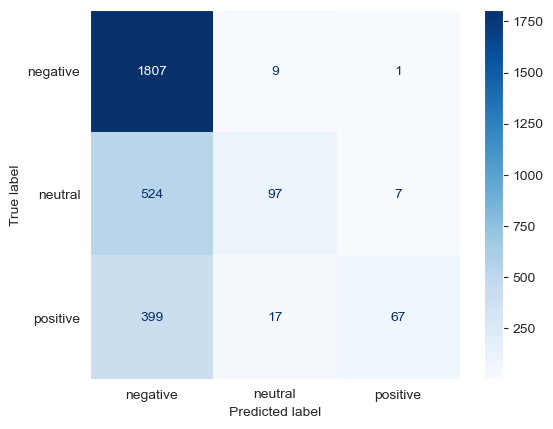

In [105]:
print('MB Model')
report(multinomial_nb)

Logistic Regression
              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.81      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



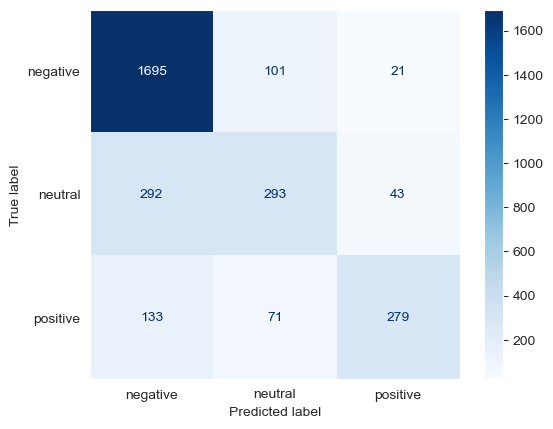

In [106]:
print("Logistic Regression")
report(logistic_model)

SVC
              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



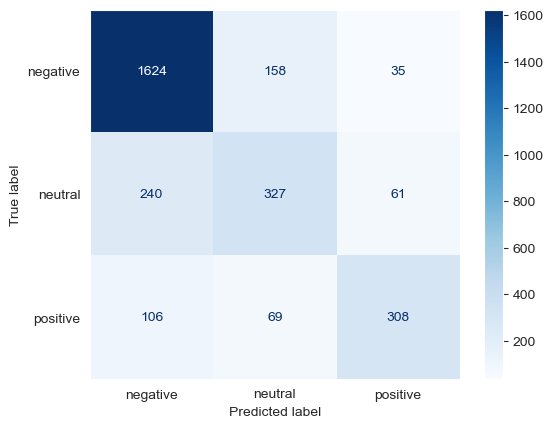

In [107]:
print('SVC')
report(svc)

In [108]:
from sklearn.pipeline import Pipeline

In [110]:
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [111]:
pipe.fit(df['text'], df['airline_sentiment'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [115]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.96      0.99      0.97      1817
     neutral       0.95      0.87      0.91       628
    positive       0.96      0.93      0.95       483

    accuracy                           0.96      2928
   macro avg       0.96      0.93      0.94      2928
weighted avg       0.96      0.96      0.95      2928



In [112]:
new_tweet = "I love this airline!"
pipe.predict([new_tweet])

array(['positive'], dtype='<U8')